In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv


In [2]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

# Import Libraries and load the dataset¶

In [3]:
df=pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# Check features of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
df.drop(['MEDICAL_UNIT'],axis=1,inplace=True)

In [8]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [9]:
df['USMER'].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

In [10]:
df['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [11]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].replace([1,2,3],1)
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].replace([4,5,6,7],2)

In [12]:
df.CLASIFFICATION_FINAL.value_counts()

2    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64

In [13]:
df["MONTH"] = df.DATE_DIED.str.split("/", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("/", expand = True)[2]

In [14]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,MONTH,YEAR
0,2,1,1,03/05/2020,97,1,65,2,2,2,...,1,2,2,2,2,2,1,97,05,2020
1,2,2,1,03/06/2020,97,1,72,97,2,2,...,1,2,2,1,1,2,2,97,06,2020
2,2,2,2,09/06/2020,1,2,55,97,1,2,...,2,2,2,2,2,2,1,2,06,2020
3,2,1,1,12/06/2020,97,2,53,2,2,2,...,2,2,2,2,2,2,2,97,06,2020
4,2,2,1,21/06/2020,97,2,68,97,1,2,...,1,2,2,2,2,2,1,97,06,2020


In [15]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [16]:
df['PREGNANT'] = df['PREGNANT'].replace([97,98],1)

In [17]:
df['PREGNANT'].value_counts()

1    535396
2    513179
Name: PREGNANT, dtype: int64

In [18]:
df['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [19]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

# # visualizing the data

In [20]:
df['YEAR'].value_counts()

2020    74402
2021      312
Name: YEAR, dtype: int64

<AxesSubplot:ylabel='PREGNANT'>

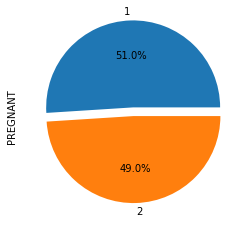

In [21]:
df['PREGNANT'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[.1,0])

<AxesSubplot:ylabel='PREGNANT'>

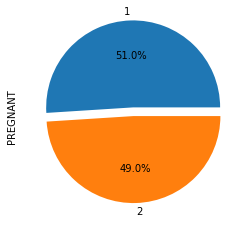

In [22]:
df['PREGNANT'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[.1,0])

Text(0.5, 1.0, 'CLASIFFICATION_FINAL')

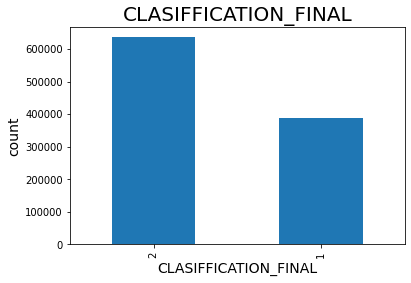

In [23]:
df['CLASIFFICATION_FINAL'].value_counts().plot(kind='bar')
plt.xlabel('CLASIFFICATION_FINAL',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('CLASIFFICATION_FINAL',fontsize=20)

Text(0.5, 1.0, 'AGE')

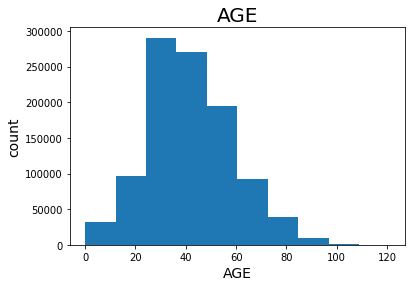

In [24]:
df['AGE'].plot(kind='hist')
plt.xlabel('AGE',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('AGE',fontsize=20)

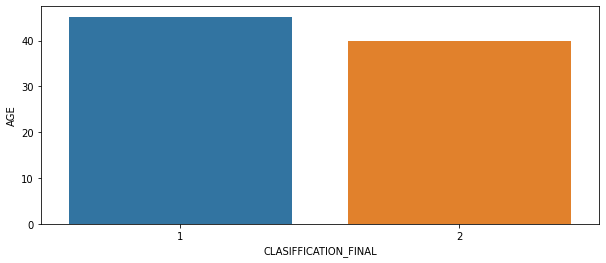

In [25]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='CLASIFFICATION_FINAL',y='AGE',data=df)

Text(0.5, 1.0, 'death every year')

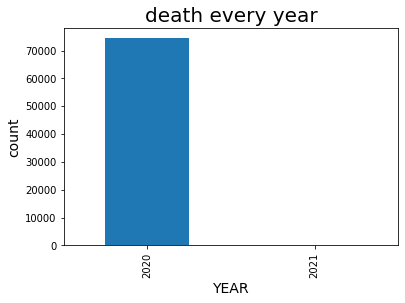

In [26]:
df['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('YEAR',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('death every year',fontsize=20)

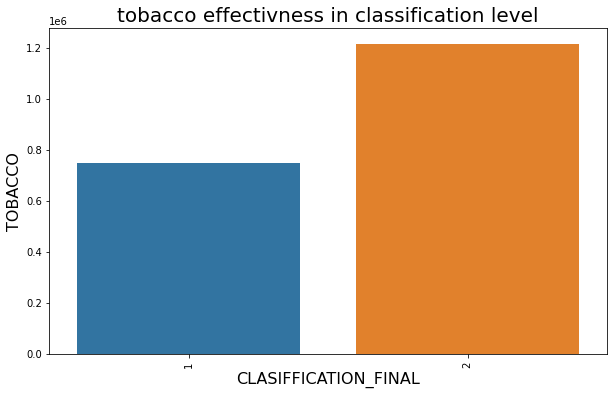

In [27]:
b=df.groupby(['CLASIFFICATION_FINAL'])['TOBACCO'].sum().reset_index()
plt.figure(figsize=(10,6))
ax=sns.barplot(data=b,x='CLASIFFICATION_FINAL',y='TOBACCO')
plt.xlabel('CLASIFFICATION_FINAL',fontsize=16)
plt.ylabel('TOBACCO',fontsize=16)
plt.title('tobacco effectivness in classification level',fontsize=20)
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:ylabel='INTUBED'>

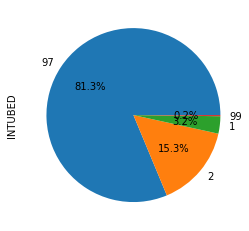

In [28]:
df['INTUBED'].value_counts().plot(kind='pie',autopct='%1.1f%%')

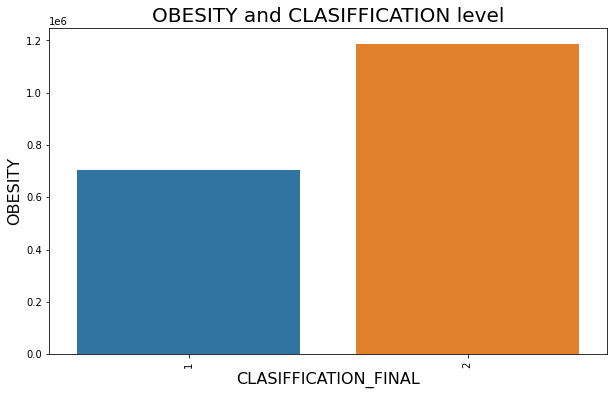

In [29]:
b=df.groupby(['CLASIFFICATION_FINAL'])['OBESITY'].sum().reset_index()
plt.figure(figsize=(10,6))
ax=sns.barplot(data=b,x='CLASIFFICATION_FINAL',y='OBESITY')
plt.xlabel('CLASIFFICATION_FINAL',fontsize=16)
plt.ylabel('OBESITY',fontsize=16)
plt.title('OBESITY and CLASIFFICATION level',fontsize=20)
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

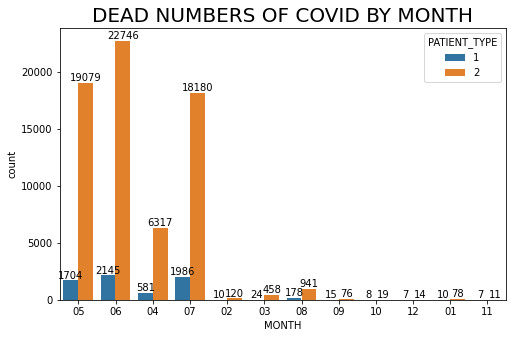

In [30]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY MONTH", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

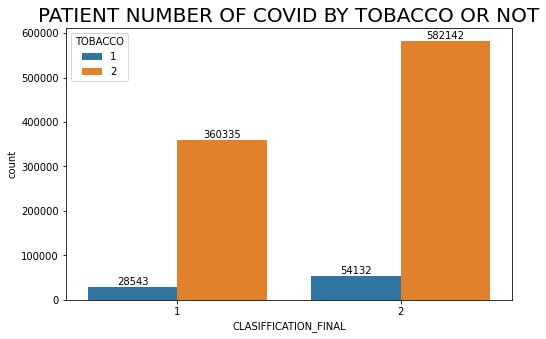

In [31]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "CLASIFFICATION_FINAL", hue = "TOBACCO", data = df)
plt.title("PATIENT NUMBER OF COVID BY TOBACCO OR NOT", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

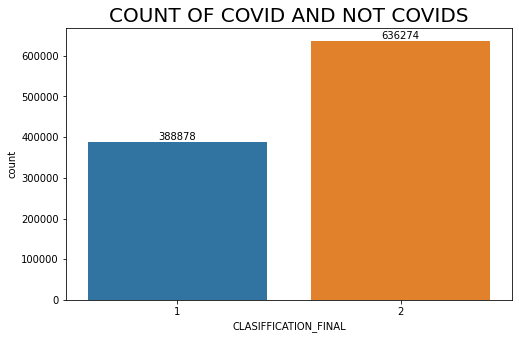

In [32]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.CLASIFFICATION_FINAL)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("COUNT OF COVID AND NOT COVIDS", fontsize = 20);

# correlations between features

In [33]:
df.corr()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,-0.003075,-0.188866,0.187878,0.151354,-0.057551,0.002393,0.058680,0.024260,0.010879,0.014838,0.055607,0.022780,0.019816,0.009891,0.040443,-0.015738,0.028334,0.187321
SEX,-0.003075,1.000000,0.089825,-0.089420,-0.080056,0.029460,-0.978735,-0.011262,-0.003119,0.044411,0.007088,-0.003429,0.022893,-0.011244,0.017757,-0.013786,-0.101957,-0.053868,-0.089326
PATIENT_TYPE,-0.188866,0.089825,1.000000,-0.992789,-0.652476,0.321599,-0.090093,-0.257064,-0.115524,0.013465,-0.091348,-0.233731,-0.091863,-0.103011,-0.064339,-0.148734,-0.004803,-0.190563,-0.992264
INTUBED,0.187878,-0.089420,-0.992789,1.000000,0.651750,-0.319297,0.089740,0.255600,0.115028,-0.013845,0.091746,0.231856,0.091952,0.102621,0.063369,0.148477,0.004925,0.188076,0.999442
PNEUMONIA,0.151354,-0.080056,-0.652476,0.651750,1.000000,-0.279857,0.076394,0.216261,0.093020,-0.010483,0.063008,0.191581,0.054362,0.081218,0.072006,0.105337,0.011120,0.192197,0.650953
AGE,-0.057551,0.029460,0.321599,-0.319297,-0.279857,1.000000,-0.015967,-0.330656,-0.164685,0.024717,-0.033045,-0.390740,-0.039828,-0.131418,-0.087004,-0.100940,-0.011574,-0.152105,-0.319166
PREGNANT,0.002393,-0.978735,-0.090093,0.089740,0.076394,-0.015967,1.000000,0.006165,0.001236,-0.044796,-0.007585,-0.002867,-0.020862,0.009344,-0.021541,0.011770,0.097861,0.053265,0.089646
DIABETES,0.058680,-0.011262,-0.257064,0.255600,0.216261,-0.330656,0.006165,1.000000,0.095994,0.003830,0.053434,0.377845,0.032539,0.107933,0.115918,0.166247,0.013021,0.094379,0.255346
COPD,0.024260,-0.003119,-0.115524,0.115028,0.093020,-0.164685,0.001236,0.095994,1.000000,0.035710,0.054509,0.116294,0.036360,0.108457,0.038701,0.065298,0.063907,0.010680,0.114762
ASTHMA,0.010879,0.044411,0.013465,-0.013845,-0.010483,0.024717,-0.044796,0.003830,0.035710,1.000000,0.021225,0.016230,0.013696,0.019877,0.045165,0.003121,0.005978,-0.014408,-0.013807


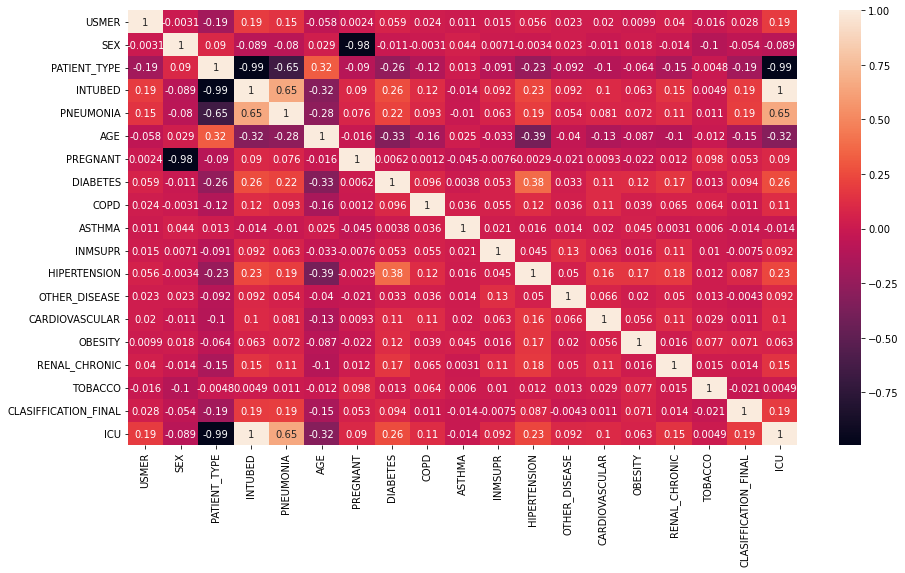

In [34]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(df.corr(), annot=True)

In [35]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [36]:
df['CLASIFFICATION_FINAL']=df['CLASIFFICATION_FINAL'].replace(1,0)
df['CLASIFFICATION_FINAL']=df['CLASIFFICATION_FINAL'].replace(2,1)

In [37]:
df['CLASIFFICATION_FINAL'].value_counts()

1    636274
0    388878
Name: CLASIFFICATION_FINAL, dtype: int64

# split dataset to training and testing data

In [38]:
X=df.drop('CLASIFFICATION_FINAL',axis=1)
y=df['CLASIFFICATION_FINAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
len(X_test)

307546

# scalering the dataset

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.74657767, -0.99875218, -0.47989686,  0.47643633, -2.53974146,
         1.37997243,  1.02045195,  0.36824486,  0.11925911,  0.17510249,
         0.11589937, -2.32898775,  0.16487813,  0.14151096,  0.42519509,
         0.13500755,  0.29617727,  0.47618441],
       [ 0.74657767,  1.00124938, -0.47989686,  0.47643633, -2.53974146,
         1.79792484, -0.97995795,  0.36824486,  0.11925911,  0.17510249,
         0.11589937, -2.32898775,  0.16487813,  0.14151096, -2.3518616 ,
        -7.40699329,  0.29617727,  0.47618441],
       [ 0.74657767,  1.00124938,  2.08378106, -2.12059115,  0.39374086,
         0.78289756, -0.97995795, -2.71558439,  0.11925911,  0.17510249,
         0.11589937,  0.42937109,  0.16487813,  0.14151096,  0.42519509,
         0.13500755,  0.29617727, -2.09698192]])

# train decision tree model

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [42]:
dt_model.fit(X_train,y_train)
dt_model.score(X_train, y_train)

0.6924468301547089

In [43]:
dt_model.score(X_test, y_test)

0.6515155456419528

# train random forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(X_train,y_train)
rf_model.score(X_train, y_train)

0.692441256065306

In [45]:
rf_model.score(X_test, y_test)

0.653170582612032

# train support vector machine model¶

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)

svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)